<a href="https://colab.research.google.com/github/SeidaAhmed/An-application-of-Machine-Learning-to-COVID-19-data/blob/main/CIND850_Midterm_Starter_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV
from keras.utils import to_categorical
#from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras import models
from keras import layers
from keras import regularizers
from google.colab import drive
from keras import layers
from keras import models
from keras import layers
from keras import optimizers
from tensorflow.keras.utils import to_categorical
#from keras.preprocessing.text import Tokenizer #importing Tokenizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

In [22]:
from google.colab import drive
drive.mount('/content/drive/')




Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [23]:
%cd drive/My Drive/

[Errno 2] No such file or directory: 'drive/My Drive/'
/content/drive/My Drive


# Question 1

Load the data file.

In [27]:
# Your code goes here.

df = pd.read_csv('Midterm_q1_LoanPrediction_data.csv')



In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


1.a) Separate the class label (quality) and divide the data into 80/20 train test splits.

In [31]:
# Your code goes here.

# Separate features and target
X = df.drop(columns=["Loan_Status"])  # Features
y = df["Loan_Status"]  # Target variable

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")




Train set size: 491, Test set size: 123


1.b) In the first part we want to create a binary classifier using MLP Classifier from sklearn package. Run the grid search available in ‘CIND850_Midterm_Starter_File.ipynb’ file to choose the best parameters for the MLP classifier.


In [32]:
# The following code shows a grid search implemented on Sklearn for MLP classifier.
#  The output of best params shows the parameters you need to run the model on.

# We define a classifier
model = MLPClassifier()

# The parameter space
parameter_space = {
    'hidden_layer_sizes': [(32,32), (64,64), (128,128)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'max_iter':[300,400],
    'batch_size':[64,128],
    'random_state':[1]
}

# The grid search
clf = GridSearchCV(model,  parameter_space, n_jobs=-1)

# The grid search fits models on the training data
clf.fit(X_train, y_train)

# It returns the best set of parameters for the models
print(clf.best_params_)

{'activation': 'relu', 'batch_size': 64, 'hidden_layer_sizes': (64, 64), 'max_iter': 300, 'random_state': 1, 'solver': 'sgd'}


1.c) Define model1 using the best parameters, fit the model on train data and test it on the test set. Report the accuracy.


In [35]:
# Your code goes here.


# Define the model with the best parameters
model1 = MLPClassifier(
    activation='relu',
    batch_size=64,
    hidden_layer_sizes=(64, 64),
    max_iter=300,
    random_state=1,
    solver='sgd'
)

# Fit the model on the training data
model1.fit(X_train, y_train)

# Predict on the test set
y_pred = model1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")





Test Accuracy: 0.6504


1.d) In the second part, we want to create a binary classifier using Keras library.  Use the following settings to fit the model. Illustrate the train and validation loss and report the best number of epochs.

3 hidden layers, 64 units per hidden layer, optimizer='rmsprop',  epochs=300, batch_size=32, validation_split=0.1 (used for validation set).

In [38]:
# Your code goes here.


# Build the neural network model for binary classification
model_binary = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer (based on number of features)
    layers.Dense(64, activation='relu'),  # First hidden layer with 128 units
    layers.Dense(64, activation='relu'),  # Second hidden layer with 128 units
    layers.Dense(1, activation='sigmoid')  # Output layer with 1 unit and sigmoid activation for binary classification
])

# Compile the model
model_binary.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the binary quality labels
history_binary = model_binary.fit(X_train, y_train, epochs=300, batch_size=32,
                                  validation_split=0.1, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model_binary.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")


Epoch 1/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5806 - loss: 103.6357 - val_accuracy: 0.7800 - val_loss: 14.1939
Epoch 2/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5683 - loss: 27.2880 - val_accuracy: 0.6000 - val_loss: 4.5411
Epoch 3/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5576 - loss: 18.2825 - val_accuracy: 0.2200 - val_loss: 38.9504
Epoch 4/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5474 - loss: 17.5508 - val_accuracy: 0.4200 - val_loss: 27.8571
Epoch 5/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5398 - loss: 30.0194 - val_accuracy: 0.7600 - val_loss: 11.3460
Epoch 6/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5617 - loss: 15.2944 - val_accuracy: 0.7800 - val_loss: 19.4476
Epoch 7/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6274 - loss: 13.8993 - val_accuracy: 0.2400 - val_loss: 45.3254
Epoch 8/300
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5853 - loss: 19.0832 - val_accu

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


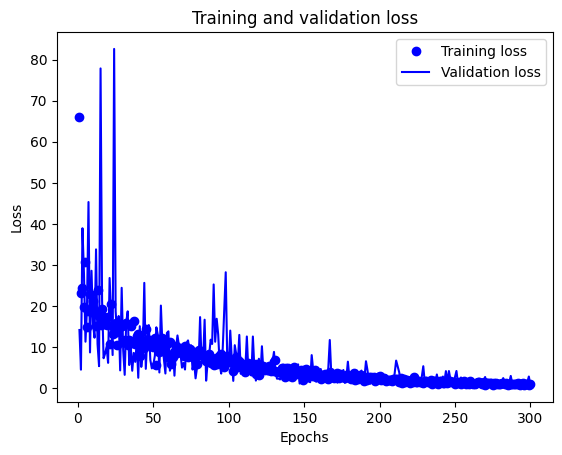

KeyError: 'acc'

<Figure size 640x480 with 0 Axes>

In [41]:
 # You can use these code to illustrate the train and validation loss
history_dict = history_binary.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


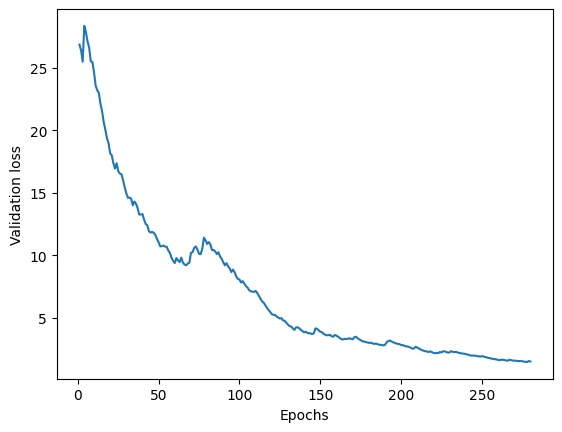

In [42]:
 # You can use this code to smooth the curves for the plots.

def smooth_curve(points, factor=0.95):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

average_mae_history = val_loss_values
smooth_mae_history = smooth_curve(average_mae_history[20:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.show()

1.e) Define model2 using the parameters and best number of epochs, you selected in part d. Report the accuracy on the test set.


In [45]:
# Your code goes here.
model_binary = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer (based on number of features)
    layers.Dense(64, activation='relu'),  # First hidden layer with 128 units
    layers.Dense(64, activation='relu'),  # Second hidden layer with 128 units
    layers.Dense(1, activation='sigmoid')  # Output layer with 1 unit and sigmoid activation for binary classification
])

# Compile the model
model_binary.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the binary quality labels
history_binary = model_binary.fit(X_train, y_train, epochs=75, batch_size=32,
                                  validation_split=0.1, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model_binary.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")


Epoch 1/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5941 - loss: 48.1404 - val_accuracy: 0.6000 - val_loss: 6.6857
Epoch 2/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5733 - loss: 26.0670 - val_accuracy: 0.5000 - val_loss: 5.0420
Epoch 3/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5700 - loss: 24.6933 - val_accuracy: 0.6000 - val_loss: 7.0394
Epoch 4/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5940 - loss: 13.8802 - val_accuracy: 0.4400 - val_loss: 10.7713
Epoch 5/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4916 - loss: 25.6991 - val_accuracy: 0.7800 - val_loss: 14.1329
Epoch 6/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5771 - loss: 16.4731 - val_accuracy: 0.4600 - val_loss: 15.5758
Epoch 7/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6116 - loss: 14.8357 - val_accuracy: 0.3400 - val_loss: 12.1071
Epoch 8/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5529 - loss: 14.4135 - val_accuracy: 0.760

1.f) Compare the models from part c and e. Can we have a definitive answer on which model performs the best?

yes we can say that model 2 perform better

Your answer goes here (Double click and edit):




# Question 2

In [63]:
# loading data
df = pd.read_csv("Midterm_q2_sample_text_data.csv", encoding= 'unicode_escape')
df.head()

,content,label
0,He also said no one could accuse Trump of want...,POLITICS
1,Kelly Rzendzian worked on message planning for...,POLITICS
2,Social science points to a few ways that peopl...,BUSINESS
3,The proposal would allow hunters to kill bear ...,POLITICS
4,Many leaders fall into the trap of thinking th...,BUSINESS


In [64]:
df["label"] = df["label"].astype('category')
df["label"] = df["label"].cat.codes
df["label"].value_counts()
df = df[df["label"] > -0.1]
df["label"].value_counts()
print(df.shape)
labels = df.label.values
texts = df["content"].values
print(texts[:3])

(4992, 2)
['He also said no one could accuse Trump of wanting a shutdown But Trump previously indicated a shutdown could be a good thing for him politicially'
 'Kelly Rzendzian worked on message planning for the presidential campaign before joining the Commerce Department she wrote in her resume'
 'Social science points to a few ways that people find lasting deep satisfaction None of them require a trip to the mall']


In [65]:
# Tokenizing
# storing the data
labels = df.label.values
texts = df["content"].values

# tokenizing the text
maxlen = 100

max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)



In [66]:
# Splits the data into a training set and a validation set, but first shuffles the data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

2.a)Randomly divide the dataset into train and test sets by using the 80/20 split.

In [68]:

# Perform an 80/20 train-test split
x_train, x_test, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)


In [69]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [70]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

 2.b )Train a densely connected network for 30 epochs, with two hidden layers each with 32 units and ‘relu’ activations.  Use ‘rmsprop’ as the optimizer and use 0.3 as your validation split ratio.



In [74]:


# Define the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer 1
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])
# Train the model with a 30-epoch run and 30% validation split
ghistory = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.3,  # 30% of training data used for validation
    verbose=1
)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2962 - loss: 716.1080 - val_accuracy: 0.4730 - val_loss: 91.6178
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4975 - loss: 68.7195 - val_accuracy: 0.4189 - val_loss: 30.9286
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5041 - loss: 35.4205 - val_accuracy: 0.6689 - val_loss: 24.3233
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4960 - loss: 29.6123 - val_accuracy: 0.6892 - val_loss: 38.6980
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5968 - loss: 25.6443 - val_accuracy: 0.6892 - val_loss: 23.2147
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5679 - loss: 24.6044 - val_accuracy: 0.6959 - val_loss: 31.8205
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5802 - loss: 27.4255 - val_accuracy: 0.6959 - val_loss: 39.6981
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6165 - loss: 27.7387 - val_accuracy: 0.3176 - va

2.c) Illustrate and report training and validation loss, validation accuracy and the best epoch to stop the training.


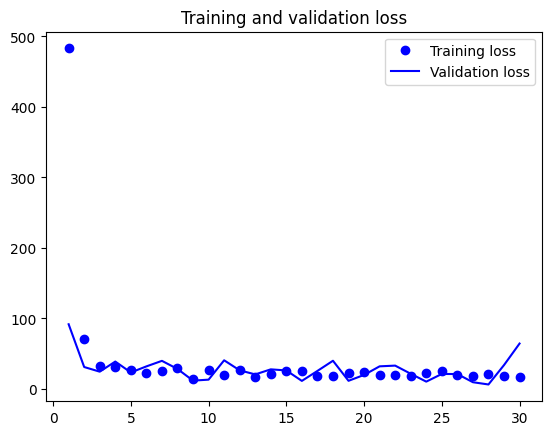

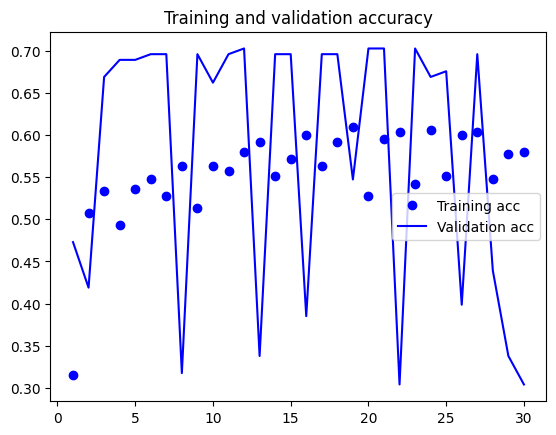

In [75]:
acc = ghistory.history['accuracy']
val_acc = ghistory.history['val_accuracy']
loss = ghistory.history['loss']
val_loss = ghistory.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [ ]:
# Your code goes here.




2.d) Implement one of regularization strategies, namely, weighted regularization or dropout, and visually compare against the original model trained in part (b). (you can freely select regularization parameters, e.g., dropout rate)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6653 - loss: 349.0683 - val_accuracy: 0.6959 - val_loss: 62.5718
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6110 - loss: 232.2373 - val_accuracy: 0.6892 - val_loss: 55.0827
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5555 - loss: 237.4624 - val_accuracy: 0.5608 - val_loss: 30.8647
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5780 - loss: 239.6763 - val_accuracy: 0.5338 - val_loss: 38.6605
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5787 - loss: 198.7321 - val_accuracy: 0.4730 - val_loss: 23.7883
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5521 - loss: 229.1633 - val_accuracy: 0.5405 - val_loss: 30.6081
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5631 - loss: 122.9680 - val_accuracy: 0.5338 - val_loss: 40.4690
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5549 - loss: 156.1263 - val_accuracy: 0.540

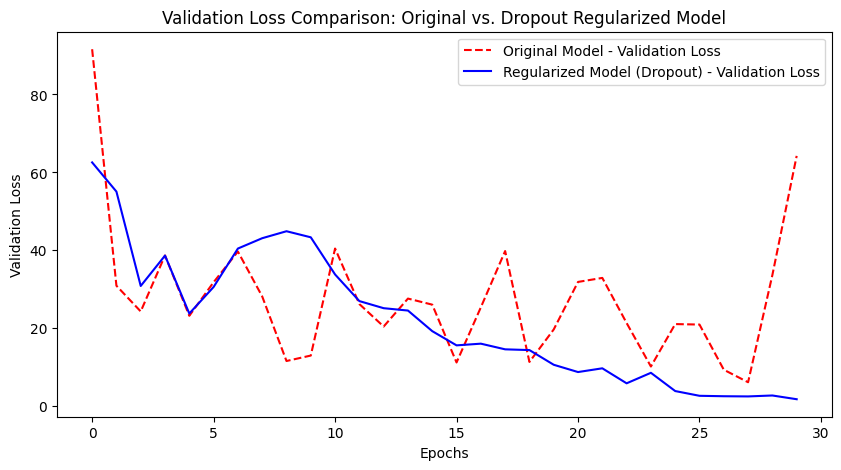

In [78]:
# Your code goes here.
# Regularized Model (With Dropout)
from tensorflow.keras.layers import Dense, Dropout
regularized_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Dropout with a rate of 30%
    Dense(32, activation='relu'),
    Dropout(0.3),  # Dropout applied to second layer as well
    Dense(1, activation='sigmoid')
])

# Compile the regularized model
regularized_model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the regularized model
history_regularized = regularized_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.3,
    verbose=1
)

# Plot Training & Validation Loss Comparison
plt.figure(figsize=(10, 5))

plt.plot(ghistory.history['val_loss'], label='Original Model - Validation Loss', linestyle='dashed', color='red')
plt.plot(history_regularized.history['val_loss'], label='Regularized Model (Dropout) - Validation Loss', color='blue')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.title('Validation Loss Comparison: Original vs. Dropout Regularized Model')
plt.show()

